About this notebook:
A sentiment analysis job about the problems of each major U.S. airline. 
Dataset is in the form of csv obtained from Kaggle originally comes from Crowdflower's Data for Everyone Library.
The dataset contains whether the sentiment of the tweets in the given set was positive, neutral, or negative for six major US airlines namely: American, Delta, Southwest, United, US Airways, Virgin America.

### Tags: Text processing and mining, Word Cloud, Data Visualization, Classification, Random Forest, Ensemble Methods, Feature Extraction, TF-IDF, Machine Learning, Evaluation

In [40]:
#Import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

#For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For text processing
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

#Regex
import re

#Feature selection
from sklearn.feature_extraction.text import TfidfVectorizer

#For classification
from sklearn.ensemble import RandomForestClassifier

#For evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Save and load model
import pickle

### Data Analysis

In [2]:
#Read the data into a dataframe df using pandas
df = pd.read_csv('Tweets.csv')

In [3]:
#See the first 10 instances of the dataset
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [4]:
#See the last 10 instances of the dataset
df.tail(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14630,569588473050611712,positive,1.0000,NaN,NaN,American,NaN,Laurelinesblog,NaN,0,@AmericanAir Thanks! He is.,NaN,2015-02-22 12:04:09 -0800,"Chapel Hill, NC",NaN
14631,569588464896876545,negative,1.0000,Bad Flight,1.0000,American,NaN,MDDavis7,NaN,0,@AmericanAir thx for nothing on getting us out...,NaN,2015-02-22 12:04:07 -0800,US,Eastern Time (US & Canada)
14632,569587813856841728,neutral,0.6760,NaN,0.0000,American,NaN,Chad_SMFYM,NaN,0,"“@AmericanAir: @TilleyMonsta George, that does...",NaN,2015-02-22 12:01:31 -0800,NaN,Central Time (US & Canada)
14633,569587705937600512,negative,1.0000,Cancelled Flight,1.0000,American,NaN,RussellsWriting,NaN,0,@AmericanAir my flight was Cancelled Flightled...,NaN,2015-02-22 12:01:06 -0800,Los Angeles,Arizona
14634,569587691626622976,negative,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,@AmericanAir right on cue with the delays👌,NaN,2015-02-22 12:01:02 -0800,NaN,Quito
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [5]:
#Get the summary statistics
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [6]:
#Shape of data rows and columns
df.shape

(14640, 15)

In [7]:
#Get info about data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [8]:
#The number of tweets for each airline
df.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [9]:
#Number of each type of sentiment 
df.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [10]:
#Total number of negative reasons
df.negativereason.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

### Data Visualization

Text(0,0.5,'No. of Tweets')

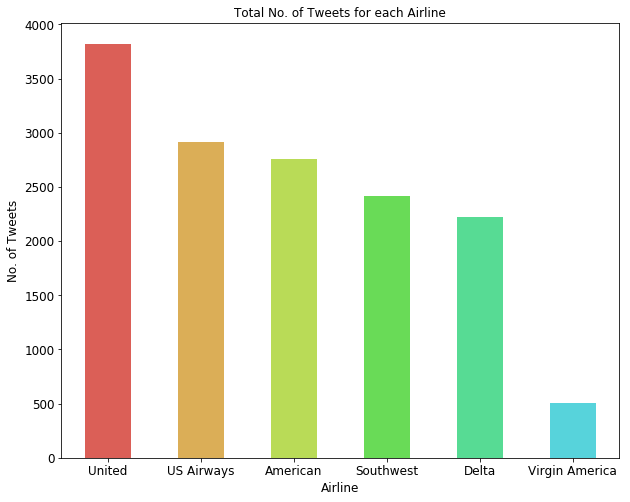

In [11]:
#Plot the number of tweets each airlines has received
colors=sns.color_palette("hls", 10) 
pd.Series(df["airline"]).value_counts().plot(kind = "bar",color=colors,figsize=(10,8),fontsize=12,rot = 0, title = "Total No. of Tweets for each Airline")
plt.xlabel('Airline', fontsize=12)
plt.ylabel('No. of Tweets', fontsize=12)

Text(0,0.5,'No. of Tweets')

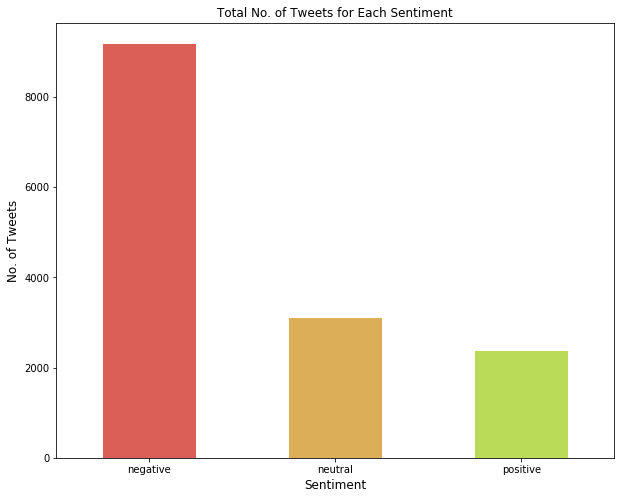

In [12]:
#Plot the number of each sentiment category
colors=sns.color_palette("hls", 10)
pd.Series(df["airline_sentiment"]).value_counts().plot(kind = "bar",color=colors,figsize=(10,8),rot=0, title = "Total No. of Tweets for Each Sentiment")
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('No. of Tweets', fontsize=12)

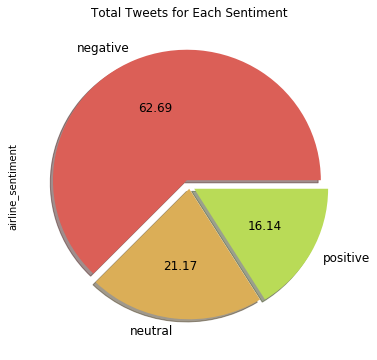

In [13]:
#Create a pie chart
colors=sns.color_palette("hls", 10)
pd.Series(df["airline_sentiment"]).value_counts().plot(kind="pie",colors=colors,labels=["negative", "neutral", "positive"],explode=[0.05,0.02,0.04],shadow=True,autopct='%.2f', fontsize=12,figsize=(6, 6),title = "Total Tweets for Each Sentiment")

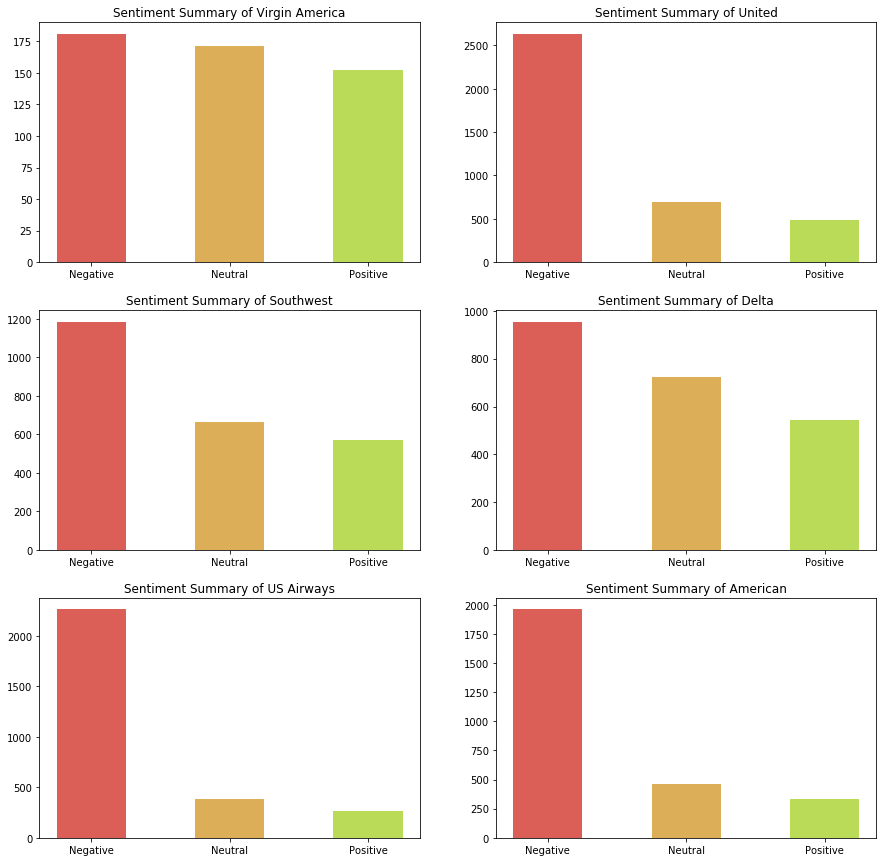

In [14]:
#Plot summary charts 
def plot_sub_sentiment(Airline):
    pdf = df[df['airline']==Airline]
    count = pdf['airline_sentiment'].value_counts()
    Index = [1,2,3]
    color=sns.color_palette("hls", 10)
    plt.bar(Index,count,width=0.5,color=color)
    plt.xticks(Index,['Negative','Neutral','Positive'])
    plt.title('Sentiment Summary of' + " " + Airline)

airline_name = df['airline'].unique()
plt.figure(1,figsize=(15,15))
for i in range(6):
    plt.subplot(3,2,i+1)
    plot_sub_sentiment(airline_name[i])

Text(0,0.5,'No. of Tweets')

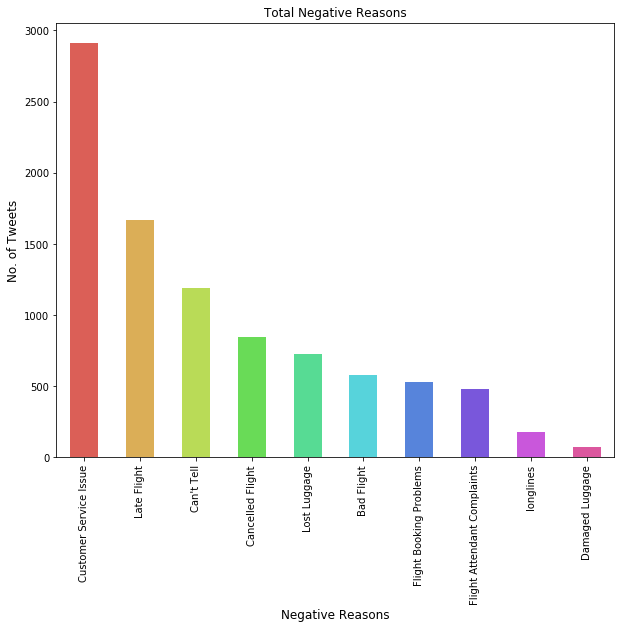

In [15]:
#Plotting all the negative reasons 
color=sns.color_palette("hls", 10)
pd.Series(df["negativereason"]).value_counts().plot(kind = "bar",color=color,figsize=(10,8),title = "Total Negative Reasons")
plt.xlabel('Negative Reasons', fontsize=12)
plt.ylabel('No. of Tweets', fontsize=12)

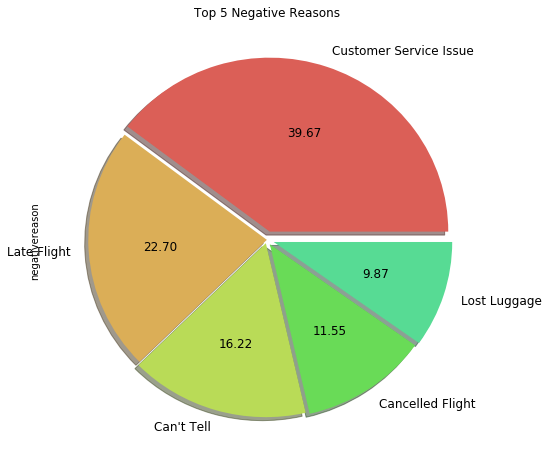

In [16]:
#Pie chart for negative reasons (Top 5)
color=sns.color_palette("hls", 10)
pd.Series(df["negativereason"]).value_counts().head(5).plot(kind="pie",labels=["Customer Service Issue", "Late Flight", "Can't Tell","Cancelled Flight","Lost Luggage"],colors=color,autopct='%.2f',explode=[0.05,0,0.02,0.03,0.04],shadow=True,fontsize=12,figsize=(8, 8),title="Top 5 Negative Reasons")

In [17]:
#Frequency table 
Freq_sentiment=pd.crosstab(df.airline, df.airline_sentiment)
Freq_sentiment

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


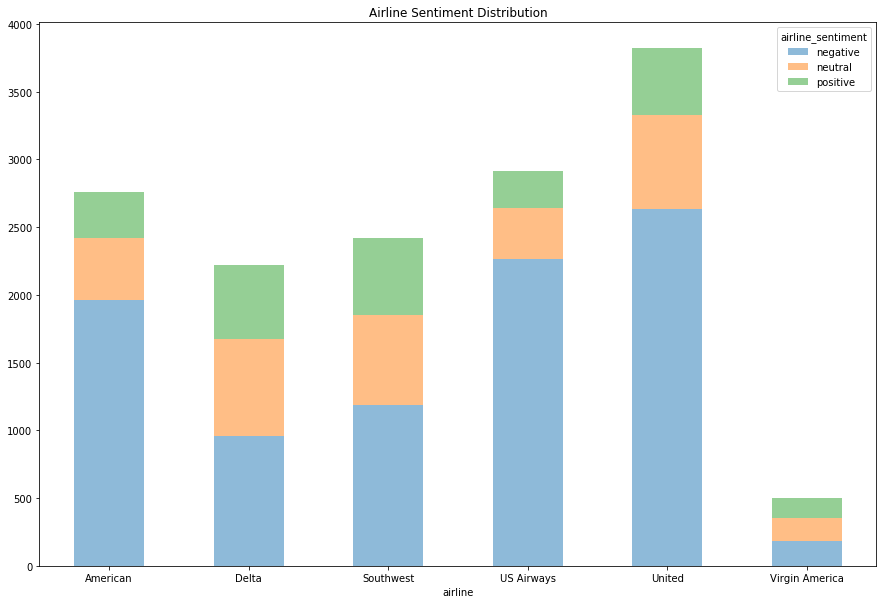

In [18]:
#Frequency plot using bar graph for the airlines
pd.crosstab(index = df["airline"],columns = df["airline_sentiment"]).plot(kind='bar',figsize=(15, 10),alpha=0.5,rot=0,stacked=True,title="Airline Sentiment Distribution")

### Visualization with Word Cloud

In [19]:
#Visualization using wordcloud for the negative tweets
df1=df[df['airline_sentiment']=='negative']
words = ' '.join(df1['text'])
cleaned_word = " ".join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word != 'RT'])

In [20]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='pink', width=4000, height=3500).generate(cleaned_word)

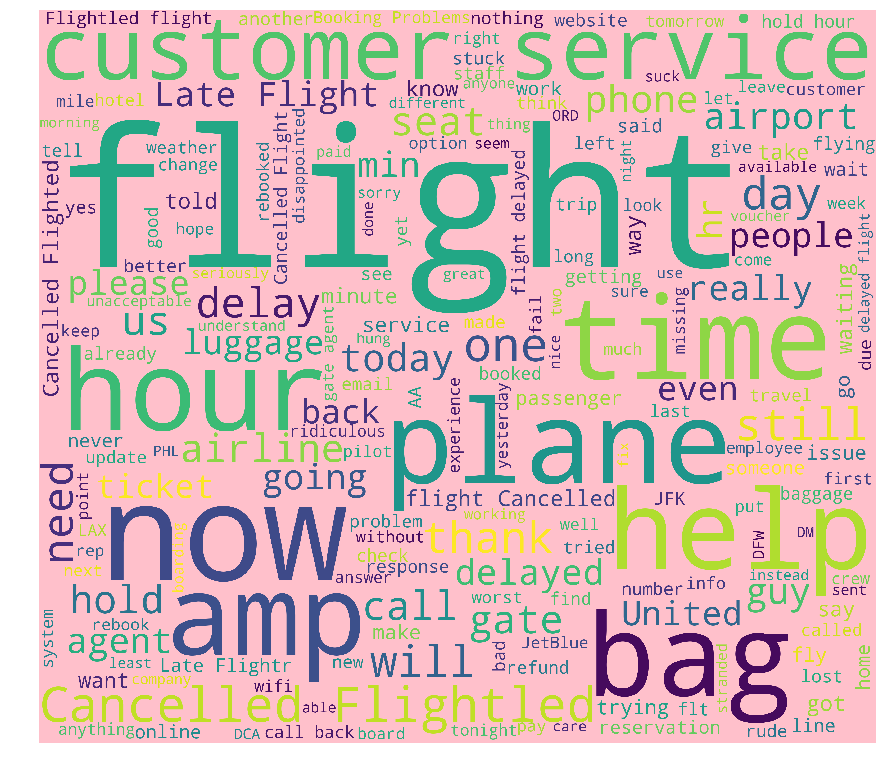

In [21]:
plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [22]:
#visualization using wordcloud for the positive tweets
df2=df[df['airline_sentiment']=='positive']
words = ' '.join(df2['text'])
cleaned_word = " ".join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word != 'RT'])

In [23]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='green', width=4000, height=3500).generate(cleaned_word)

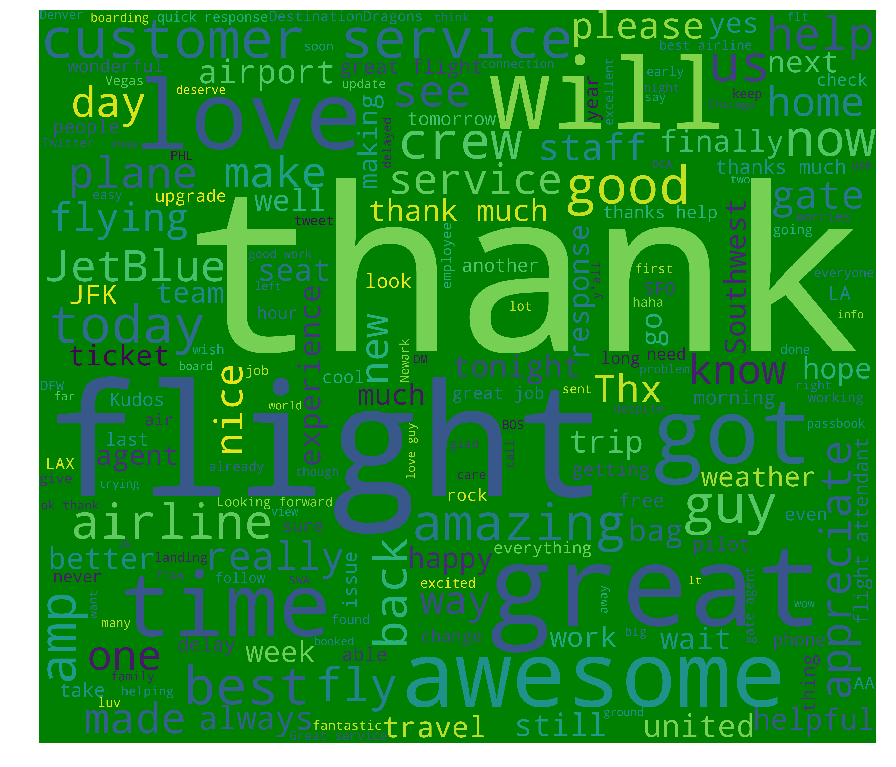

In [24]:
plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [25]:
#visualization using wordcloud for the neutral tweets
df3=df[df['airline_sentiment']=='neutral']
words = ' '.join(df3['text'])
cleaned_word = " ".join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word != 'RT'])

In [26]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=4000, height=3500).generate(cleaned_word)

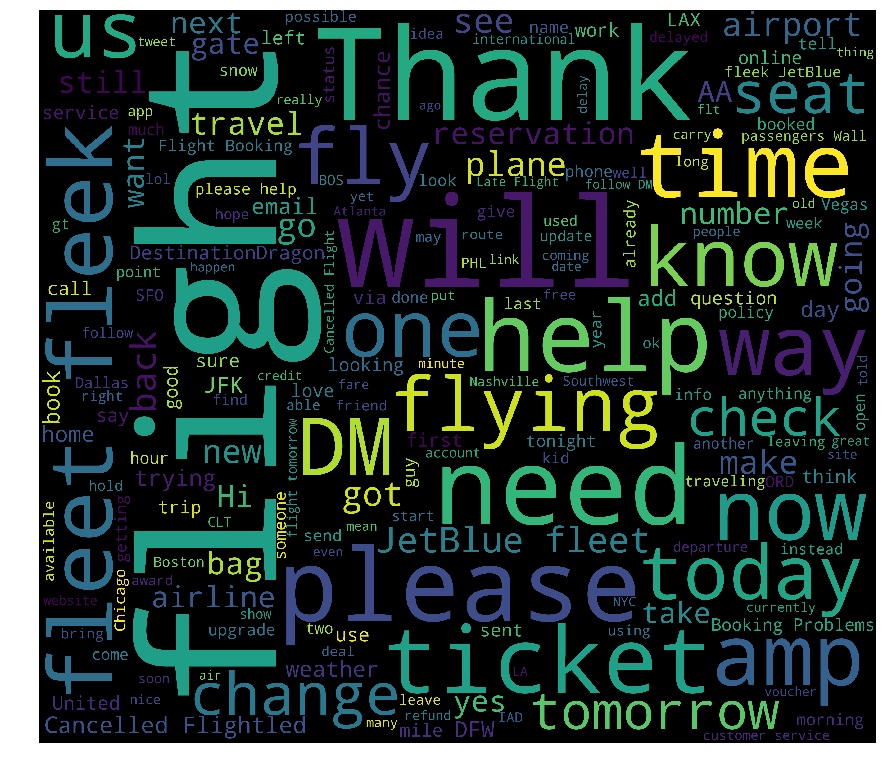

In [27]:
plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Preparing Data for Mining

In [28]:
def tweet_to_words(raw_text):
    letters = re.sub("[^a-zA-Z]", " ",raw_text) #Grab letters
    words = letters.lower().split() #Lowercase                             
    stops = set(stopwords.words("english")) #Get unique stopwords                  
    meaningful_words = [w for w in words if not w in stops] 
    return ( " ".join( meaningful_words )) 

In [29]:
def clean_tweet_length(raw_text):
    letters = re.sub("[^a-zA-Z]", " ",raw_text) 
    words = letters.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

In [30]:
#Let us merge positive and neutral sentiments since the distribution is imbalanced
df['sentiment']=df['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)
df.sentiment.head()

0    1
1    1
2    1
3    0
4    0
Name: sentiment, dtype: int64

In [31]:
#Append two new columns
df['clean_tweet']=df['text'].apply(lambda x: tweet_to_words(x))
df['Tweet_length']=df['text'].apply(lambda x: clean_tweet_length(x))

### Feature Extraction 

In [32]:
#Create the transform
vectorizer = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  

#Encode document
X_vector = vectorizer.fit_transform(df['clean_tweet']).toarray()

#Summarize encoded vector
print("The shape of X_vector is: ", X_vector.shape)

The shape of X_vector is:  (14640, 1500)


### Train-Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_vector, df['sentiment'], test_size=0.2, random_state=0)  

### Classification of sentiments using Random Forest Classifier

In [34]:
classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
classifier.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [36]:
y_pred = classifier.predict(X_test) 

### View results of classifier

In [37]:
print(confusion_matrix(y_test,y_pred))  

[[1653  217]
 [ 376  682]]


In [38]:
print(classification_report(y_test,y_pred))  

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1870
           1       0.76      0.64      0.70      1058

   micro avg       0.80      0.80      0.80      2928
   macro avg       0.79      0.76      0.77      2928
weighted avg       0.79      0.80      0.79      2928



In [39]:
print(accuracy_score(y_test, y_pred))  

0.7974726775956285


### Save the Model

In [41]:
#Save the model as a pickle object in Python
with open('rforest_classifier', 'wb') as picklefile:  
    pickle.dump(classifier,picklefile)

In [42]:
#Load the model
with open('rforest_classifier', 'rb') as training_model:  
    model = pickle.load(training_model)

In [43]:
#Verify that the model has been saved 
y_pred2 = model.predict(X_test)
print(confusion_matrix(y_test, y_pred2))  
print(classification_report(y_test, y_pred2))  
print(accuracy_score(y_test, y_pred2))  

[[1653  217]
 [ 376  682]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1870
           1       0.76      0.64      0.70      1058

   micro avg       0.80      0.80      0.80      2928
   macro avg       0.79      0.76      0.77      2928
weighted avg       0.79      0.80      0.79      2928

0.7974726775956285
